In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import miscel_tool

%load_ext autoreload
%autoreload 2

In [2]:
train_2_path = 'web_traffic_data/train_2.csv'
df_train = pd.read_csv(train_2_path)
df_train = miscel_tool.split_page_underscore(df_train)
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,project,device,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,16.0,27.0,29.0,23.0,54.0,38.0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,54.0,25.0,26.0,23.0,13.0,81.0,2PM,zh.wikipedia.org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,3C,zh.wikipedia.org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,6.0,16.0,19.0,30.0,38.0,4.0,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider


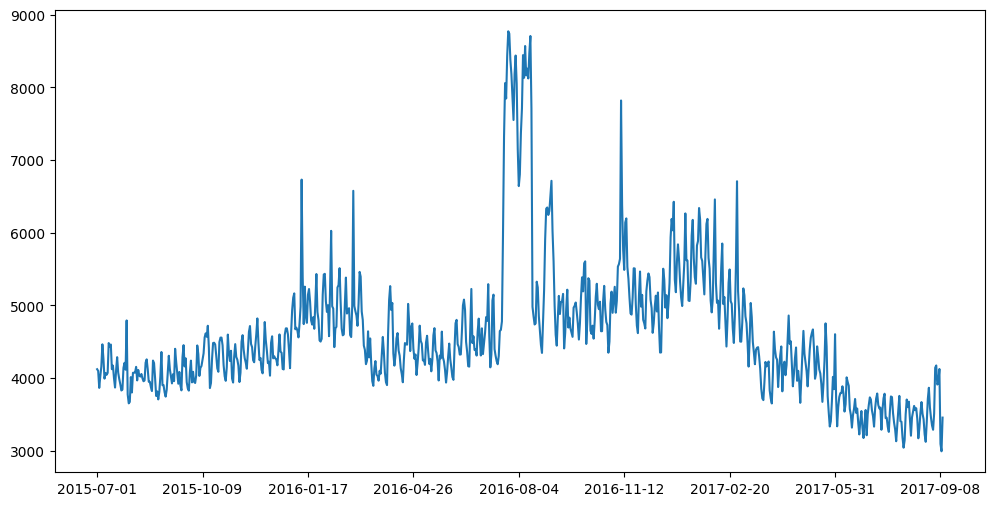

In [3]:
df_en = df_train[df_train['project'].str.contains('en\.')].copy()
time_cols = miscel_tool.extract_time_column_name(df_en)
plt.figure(figsize=(12, 6))
df_en[time_cols].mean().plot()
plt.show()

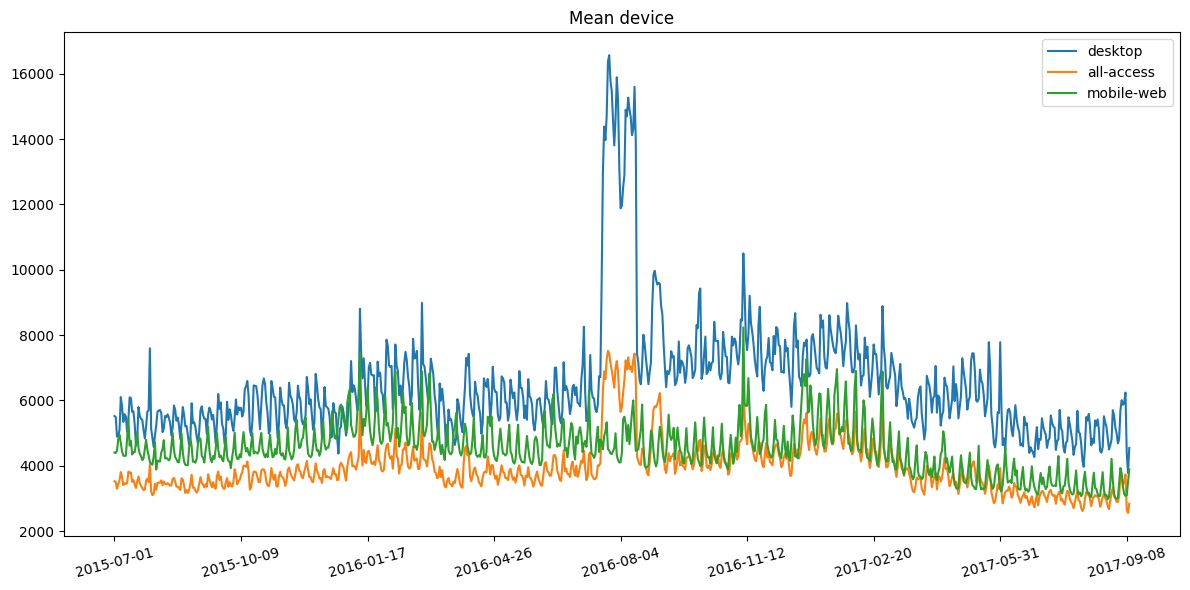

In [4]:
miscel_tool.plot_unique_value_mean(df_en, 'device')

# filter special page

In [5]:
df_en['mean_views'] = df_en[time_cols].mean(axis=1)
df_en_sort = df_en.sort_values(by='mean_views', ascending=False)
df_en_sort[['Page', 'mean_views']].head(20)

,Page,mean_views
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2.141502e+07
9774,Main_Page_en.wikipedia.org_desktop_all-agents,1.609010e+07
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,4.780634e+06
39180,Special:Search_en.wikipedia.org_all-access_all...,2.366707e+06
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,1.747446e+06
74690,Special:Search_en.wikipedia.org_mobile-web_all...,6.190888e+05
39172,Special:Book_en.wikipedia.org_all-access_all-a...,2.703444e+05
10399,Special:Book_en.wikipedia.org_desktop_all-agents,2.692098e+05
33644,Main_Page_en.wikipedia.org_all-access_spider,2.339341e+05
34257,Special:Search_en.wikipedia.org_all-access_spider,2.272107e+05


In [6]:
special_keywords = ['Main_page', 'Special:']
mask_special = df_en['Page'].str.contains('|'.join(special_keywords))
df_en[mask_special]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,project,device,agent,mean_views
10399,Special:Book_en.wikipedia.org_desktop_all-agents,174903.0,113999.0,98127.0,102158.0,127525.0,119101.0,159949.0,194830.0,177621.0,...,87814.0,156274.0,171468.0,150443.0,120639.0,Special:Book,en.wikipedia.org,desktop,all-agents,2.692098e+05
10400,Special:CiteThisPage_en.wikipedia.org_desktop_...,48817.0,30100.0,26155.0,32471.0,31401.0,37216.0,50432.0,63258.0,38053.0,...,234238.0,110995.0,45611.0,49683.0,48780.0,Special:CiteThisPage,en.wikipedia.org,desktop,all-agents,5.178754e+04
10401,Special:CreateAccount_en.wikipedia.org_desktop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1487806.0,557701.0,159814.0,146317.0,148650.0,Special:CreateAccount,en.wikipedia.org,desktop,all-agents,1.589903e+05
10402,Special:Log_en.wikipedia.org_desktop_all-agents,18273.0,5205.0,5254.0,6295.0,8001.0,5951.0,11387.0,13231.0,9190.0,...,36806.0,12441.0,4432.0,5698.0,18353.0,Special:Log,en.wikipedia.org,desktop,all-agents,1.959443e+04
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,1628266.0,1576720.0,1375372.0,1226739.0,1336675.0,1699242.0,1709755.0,1653199.0,1892392.0,...,1661313.0,1411528.0,1184336.0,967978.0,1076061.0,Special:Search,en.wikipedia.org,desktop,all-agents,1.747446e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76161,Special:WhatLinksHere/File:National_Park_Servi...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,NaN,0.0,Special:WhatLinksHere/File:National_Park_Servi...,en.wikipedia.org,mobile-web,all-agents,1.049300e+03
76162,Special:WhatLinksHere/File:Original_Barnstar.p...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,Special:WhatLinksHere/File:Original_Barnstar.png,en.wikipedia.org,mobile-web,all-agents,1.064549e+03
76853,Special:CreateAccount_en.wikipedia.org_mobile-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13398.0,15161.0,20444.0,19137.0,21768.0,Special:CreateAccount,en.wikipedia.org,mobile-web,all-agents,2.107976e+04
76854,Special:RecentChangesLinked_en.wikipedia.org_m...,613.0,538.0,795.0,4184.0,3929.0,20.0,21.0,147.0,953.0,...,1169.0,2881.0,231.0,6202.0,14860.0,Special:RecentChangesLinked,en.wikipedia.org,mobile-web,all-agents,3.692168e+03


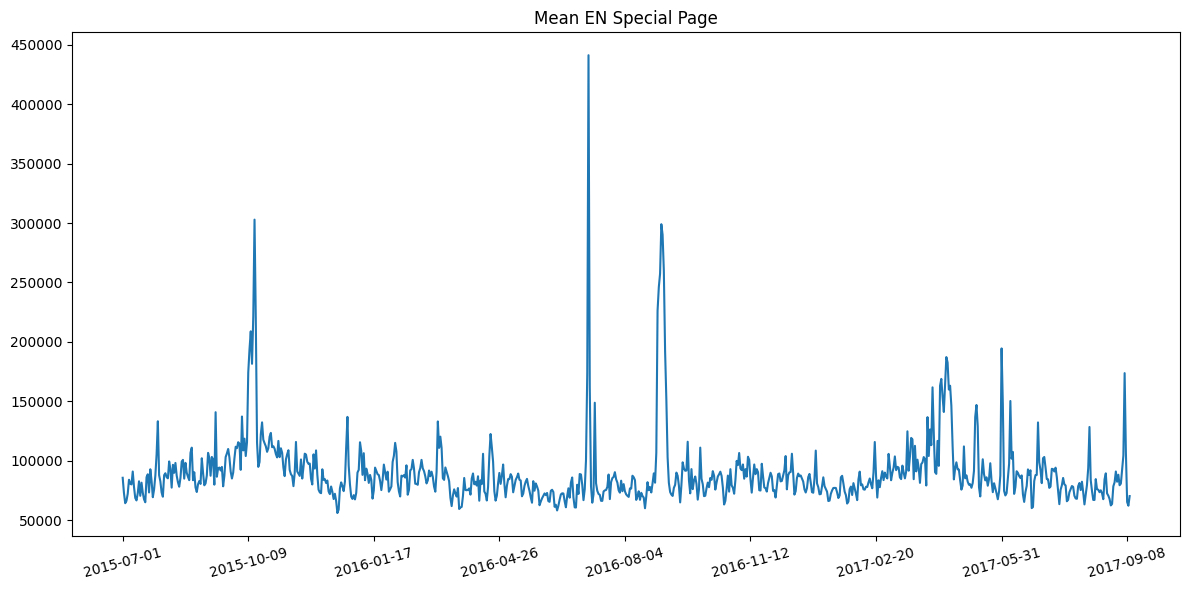

In [7]:
time_cols = miscel_tool.extract_time_column_name(df_en)
plt.figure(figsize=(12, 6))
df_en.loc[mask_special, time_cols].mean().plot()
plt.title('Mean EN Special Page')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('fig/mean_en_special_page.png')
plt.show()

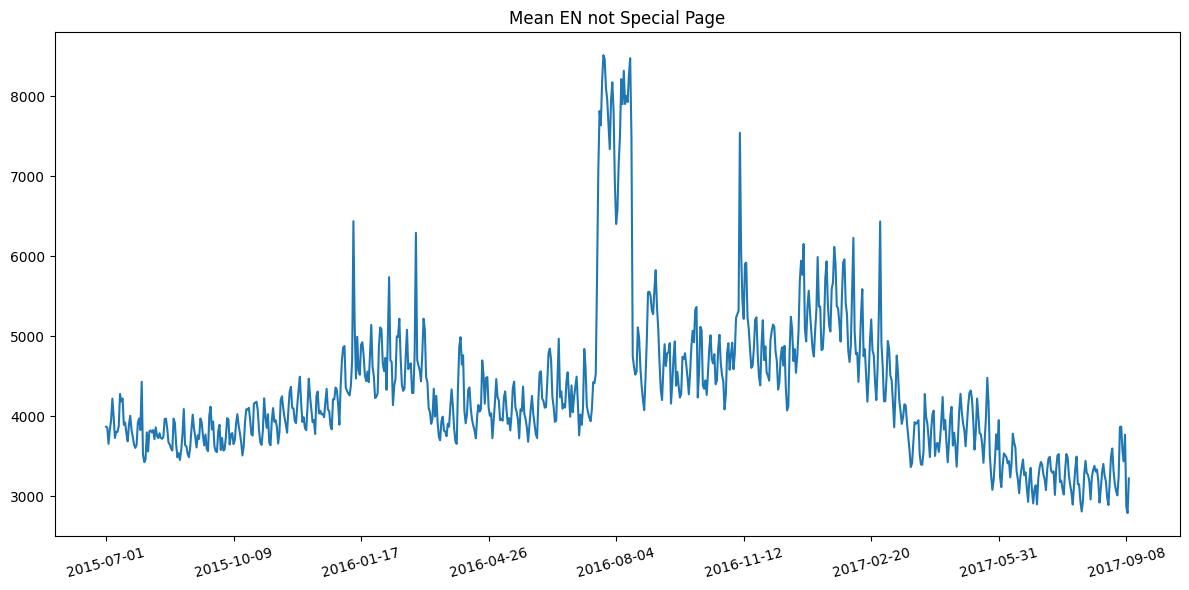

In [8]:
time_cols = miscel_tool.extract_time_column_name(df_en)
plt.figure(figsize=(12, 6))
df_en.loc[~mask_special, time_cols].mean().plot()
plt.title('Mean EN not Special Page')
plt.xticks(rotation=15)
plt.tight_layout()
# plt.savefig('fig/mean_en_not_special_page.png')
plt.show()

# mean views jump

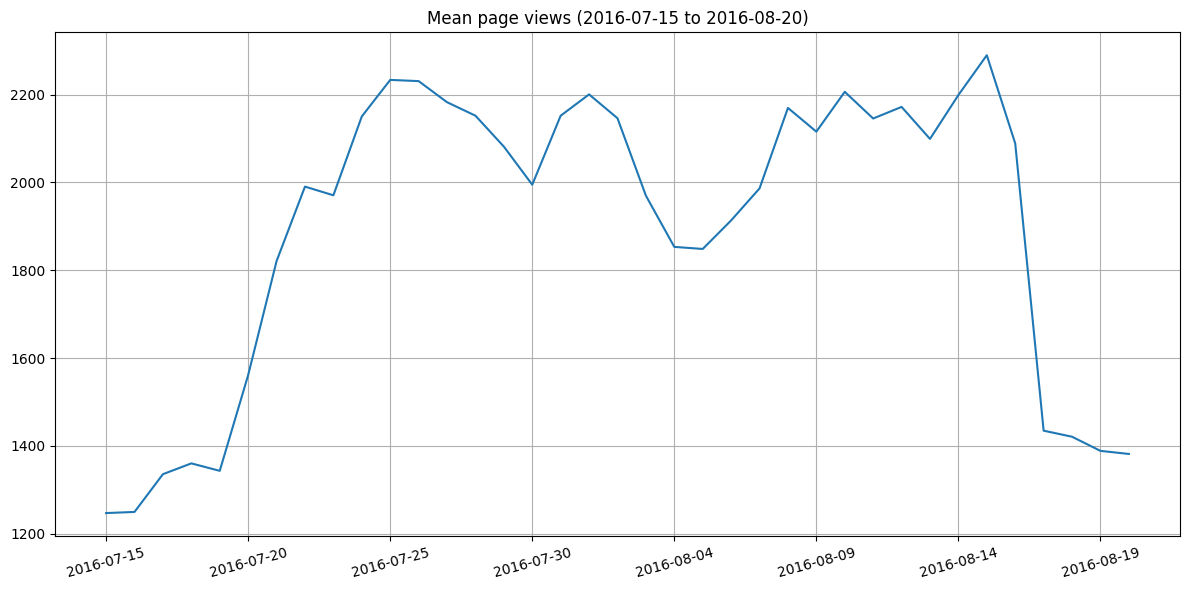

In [9]:
start_time = '2016-07-15'
end_time = '2016-08-20'
col_time = miscel_tool.extract_time_column_name(df_train)
col_interval = col_time[(col_time >= start_time) & (col_time <= end_time)]
plt.figure(figsize=(12, 6))
df_train[col_interval].mean().plot()
plt.title(f'Mean page views ({start_time} to {end_time})')
plt.xticks(rotation=15)
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
special_start = '2016-07-21'
special_end = '2016-08-16'

col_time = miscel_tool.extract_time_column_name(df_train)
mask_col_special = (col_time >= special_start) & (col_time <= special_end)
df_train['mean_special'] = df_train[col_time[mask_col_special]].mean(axis=1)
df_train['mean_not_special'] = df_train[col_time[~mask_col_special]].mean(axis=1)
df_train['special_over_not_special'] = df_train['mean_special'] / df_train['mean_not_special']
df_train[['Page', 'special_over_not_special']].head()

,Page,special_over_not_special
0,2NE1_zh.wikipedia.org_all-access_spider,1.047143
1,2PM_zh.wikipedia.org_all-access_spider,1.085284
2,3C_zh.wikipedia.org_all-access_spider,0.995966
3,4minute_zh.wikipedia.org_all-access_spider,1.004966
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.221713


In [11]:
df_special_sort = df_train.sort_values(by='special_over_not_special', ascending=False)
df_special_sort[['Page', 'special_over_not_special']].head(20)

,Page,special_over_not_special
69431,Schießerei_in_München_am_22._Juli_2016_de.wiki...,19900.793651
80292,File:Sanitary_towel_1.jpg_commons.wikimedia.or...,2530.521878
79608,File:Space_Shuttle_cockpit_01.JPG_commons.wiki...,2180.070175
66701,Simmer_Down_de.wikipedia.org_desktop_all-agents,2083.438453
50931,Schießerei_in_München_am_22._Juli_2016_de.wiki...,1994.666667
66177,Marcus_da_Gloria_Martins_de.wikipedia.org_desk...,1868.916667
141499,Schießerei_in_München_am_22._Juli_2016_de.wiki...,1668.735632
138764,Simmer_Down_de.wikipedia.org_all-access_all-ag...,1591.434908
79303,File:Battle_Hymn_of_the_Republic_(USAFB).ogg_c...,1491.837838
90023,特別:フィード項目/featured/20160804000000/ja_ja.wikipe...,1478.608696


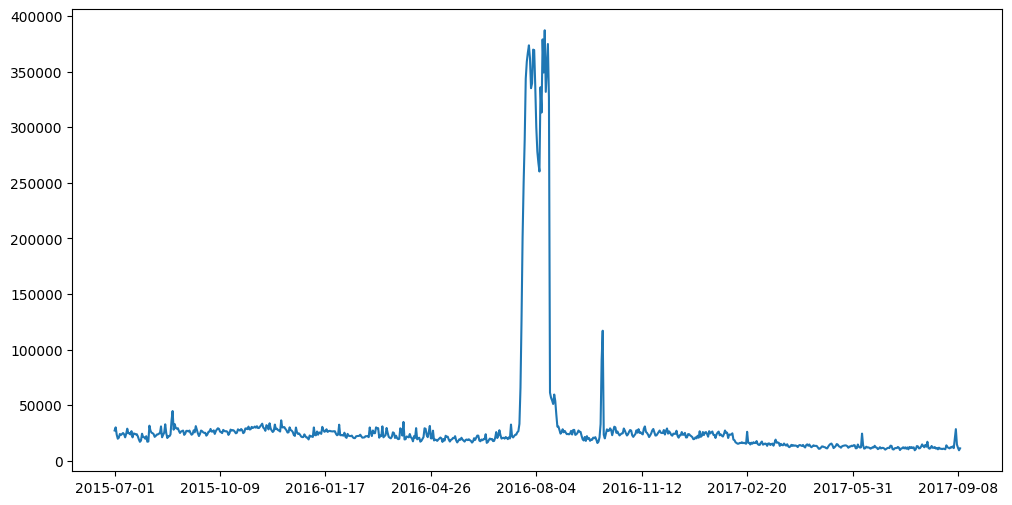

In [12]:
threshold_views = 1000
mask_threshold = df_special_sort['mean_not_special'] > threshold_views

plt.figure(figsize=(12, 6))
df_special_sort.loc[mask_threshold, col_time].iloc[:100].mean().plot()
plt.show()

In [13]:
df_special_sort.loc[mask_threshold, ['Page', 'special_over_not_special']].iloc[:30]

,Page,special_over_not_special
76748,Michael_Phelps_en.wikipedia.org_mobile-web_all...,50.271367
38350,Katie_Ledecky_en.wikipedia.org_all-access_all-...,50.003590
38748,Nicole_Johnson_(Miss_California_USA)_en.wikipe...,44.048902
41288,Michael_Phelps_en.wikipedia.org_all-access_all...,42.923157
74920,Tim_Kaine_en.wikipedia.org_mobile-web_all-agents,39.648755
92081,Michael_Phelps_es.wikipedia.org_all-access_all...,36.088432
72878,Aly_Raisman_en.wikipedia.org_mobile-web_all-ag...,30.758442
39421,Tim_Kaine_en.wikipedia.org_all-access_all-agents,30.671660
39741,All-time_Olympic_Games_medal_table_en.wikipedi...,30.130499
11636,Michael_Phelps_en.wikipedia.org_desktop_all-ag...,29.826222


## 8/5 ~ 8/21

這段期間是巴西奧運，mobile看起來在這一段也是有上升。因此7~9月應該分成8/5前後兩段來看

# The first jump

In [14]:
del df_train, df_special_sort

import gc
gc.collect()

19490

In [15]:
train_2_path = 'web_traffic_data/train_2.csv'
df_train = pd.read_csv(train_2_path)
df_train = miscel_tool.split_page_underscore(df_train)
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,project,device,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,16.0,27.0,29.0,23.0,54.0,38.0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,54.0,25.0,26.0,23.0,13.0,81.0,2PM,zh.wikipedia.org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,3C,zh.wikipedia.org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,6.0,16.0,19.0,30.0,38.0,4.0,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider


In [16]:
special_start = '2016-07-21'
special_end = '2016-08-04'

col_time = miscel_tool.extract_time_column_name(df_train)
mask_col_special = (col_time >= special_start) & (col_time <= special_end)
df_train['mean_special'] = df_train[col_time[mask_col_special]].mean(axis=1)
df_train['mean_not_special'] = df_train[col_time[~mask_col_special]].mean(axis=1)
df_train['special_over_not_special'] = df_train['mean_special'] / df_train['mean_not_special']
df_train[['Page', 'special_over_not_special']].head()

,Page,special_over_not_special
0,2NE1_zh.wikipedia.org_all-access_spider,0.966065
1,2PM_zh.wikipedia.org_all-access_spider,0.923196
2,3C_zh.wikipedia.org_all-access_spider,0.970095
3,4minute_zh.wikipedia.org_all-access_spider,0.861767
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.268939


雖然只有篩第一段，但是第二段(8/5 ~ 8/21)還是有比較高

In [17]:
df_special_sort = df_train.sort_values(by='mean_special', ascending=False)
df_special_sort[['Page', 'mean_special']].iloc[:30]

,Page,mean_special
38573,Main_Page_en.wikipedia.org_all-access_all-agents,6.030775e+07
9774,Main_Page_en.wikipedia.org_desktop_all-agents,5.536341e+07
99322,Заглавная_страница_ru.wikipedia.org_all-access...,1.471708e+07
103123,Заглавная_страница_ru.wikipedia.org_desktop_al...,1.420621e+07
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,4.790854e+06
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2.628724e+06
39180,Special:Search_en.wikipedia.org_all-access_all...,2.156814e+06
116196,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,1.895787e+06
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,1.722786e+06
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,1.579007e+06


In [18]:
mask_en = df_special_sort['project'].str.contains('en\.')
df_special_sort.loc[mask_en, ['Page', 'mean_special', 'special_over_not_special']].iloc[:30]

,Page,mean_special,special_over_not_special
38573,Main_Page_en.wikipedia.org_all-access_all-agents,6.030775e+07,2.916987
9774,Main_Page_en.wikipedia.org_desktop_all-agents,5.536341e+07,3.608497
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,4.790854e+06,1.002179
39180,Special:Search_en.wikipedia.org_all-access_all...,2.156814e+06,0.909778
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,1.722786e+06,0.985623
74690,Special:Search_en.wikipedia.org_mobile-web_all...,4.337660e+05,0.696683
39172,Special:Book_en.wikipedia.org_all-access_all-a...,2.195575e+05,0.809246
10399,Special:Book_en.wikipedia.org_desktop_all-agents,2.185203e+05,0.808811
40501,Okto_en.wikipedia.org_all-access_all-agents,2.112739e+05,11.711338
38915,Proyecto_40_en.wikipedia.org_all-access_all-ag...,2.064816e+05,4.083178


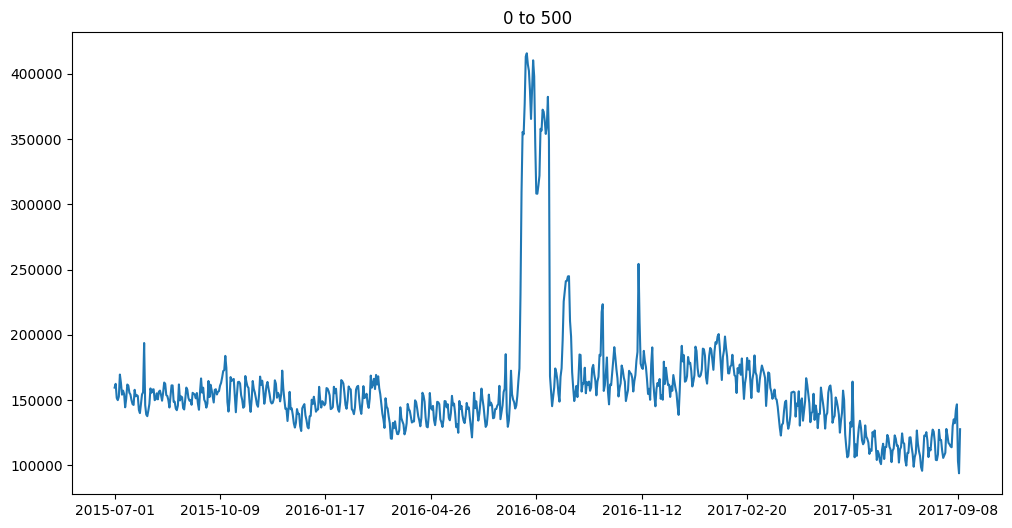

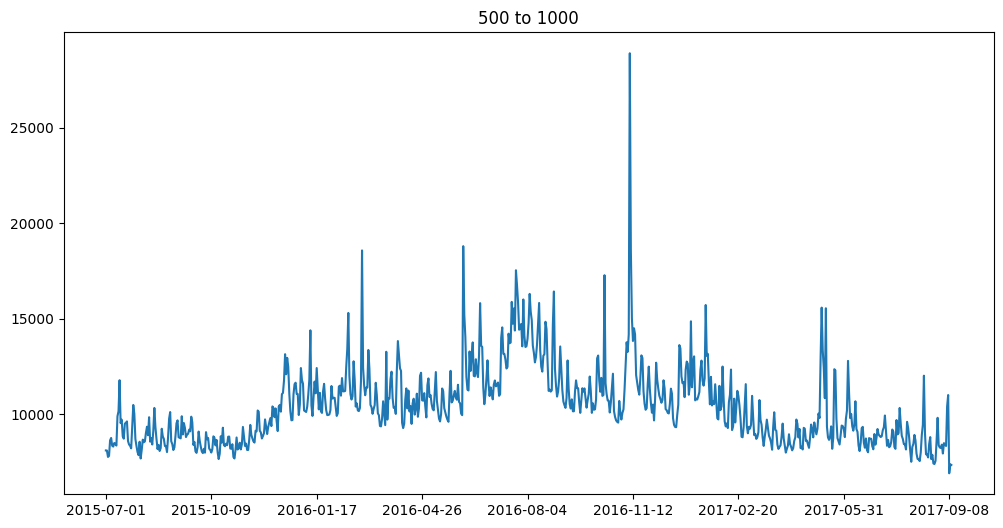

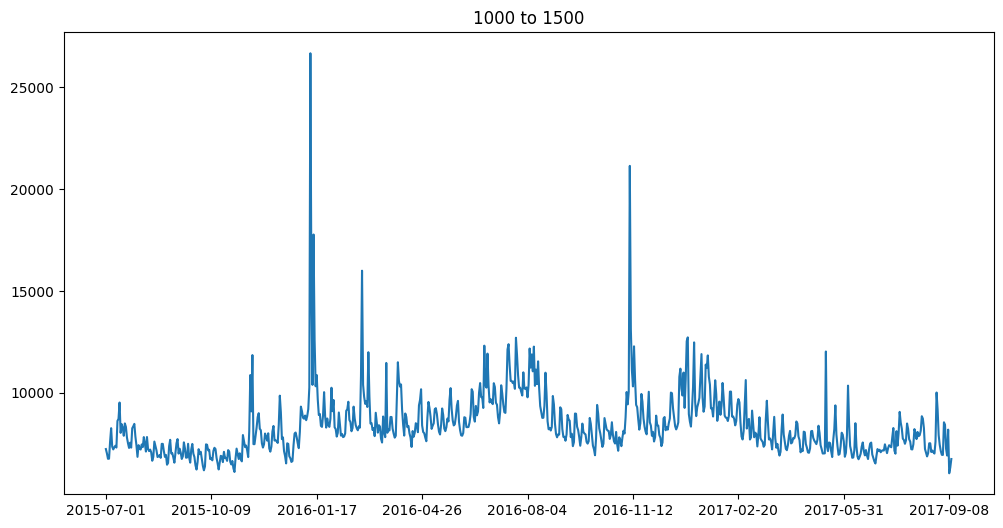

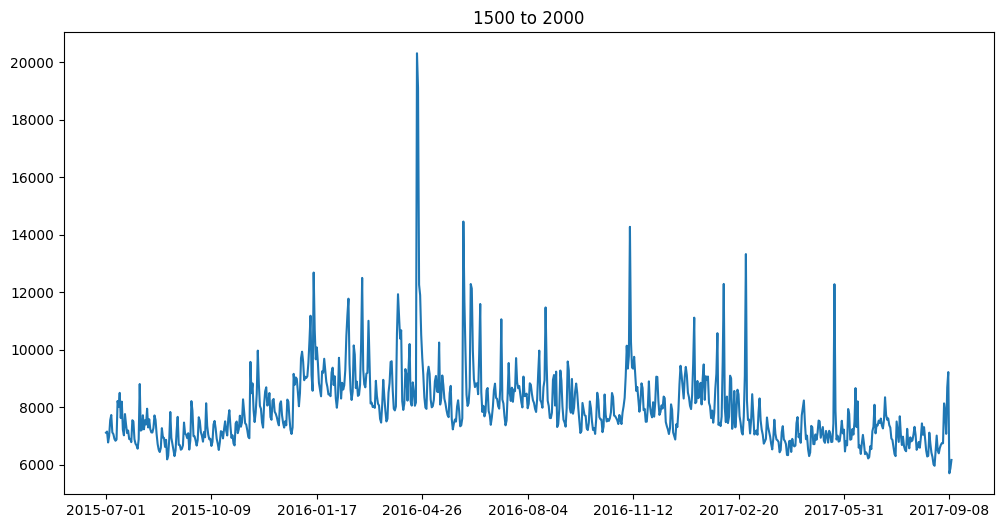

In [19]:
time_cols = miscel_tool.extract_time_column_name(df_special_sort)
for idx in range(4):
    plt.figure(figsize=(12, 6))
    start_idx = idx * 500
    end_idx = (idx + 1) * 500
    df_special_sort.loc[mask_threshold, time_cols].iloc[start_idx:end_idx].mean().plot()
    plt.title(f"{start_idx} to {end_idx}")
    plt.show()


In [22]:
top_special = 1500
mask_threshold = df_special_sort['mean_not_special'] > top_special 
mask_en = df_special_sort['project'].str.contains('en\.')
mask_wiki = df_special_sort['Page'].str.contains('Main_Page|Special:')
df_special_top_rate = df_special_sort[mask_en & mask_threshold & ~mask_wiki].iloc[:top_special]
df_special_top_rate.sort_values(by='mean_special', ascending=False).iloc[:30][['Page', 'special_over_not_special', 'mean_special']]

,Page,special_over_not_special,mean_special
40501,Okto_en.wikipedia.org_all-access_all-agents,11.711338,211273.933333
38915,Proyecto_40_en.wikipedia.org_all-access_all-ag...,4.083178,206481.600000
11712,Okto_en.wikipedia.org_desktop_all-agents,11.832840,205168.133333
41072,Donald_Trump_en.wikipedia.org_all-access_all-a...,1.422989,203933.133333
10158,Proyecto_40_en.wikipedia.org_desktop_all-agents,4.161174,200865.000000
39637,XHamster_en.wikipedia.org_all-access_all-agents,1.239790,195632.533333
39237,Suicide_Squad_(film)_en.wikipedia.org_all-acce...,5.823262,187658.000000
75127,XHamster_en.wikipedia.org_mobile-web_all-agents,1.233732,186050.333333
39421,Tim_Kaine_en.wikipedia.org_all-access_all-agents,52.528150,175484.133333
38338,Kabali_(film)_en.wikipedia.org_all-access_all-...,24.142643,169962.000000


In [32]:
mask_trump = df_train['Page'].str.contains('Trump')
df_trump = df_train[mask_trump].sort_values(by='mean_special', ascending=False)
watch_col = ['Page', 'special_over_not_special', 'mean_special']
df_trump[watch_col].iloc[:30]

,Page,special_over_not_special,mean_special
41072,Donald_Trump_en.wikipedia.org_all-access_all-a...,1.422989,203933.133333
73348,Donald_Trump_en.wikipedia.org_mobile-web_all-a...,1.401972,116680.666667
38204,Ivanka_Trump_en.wikipedia.org_all-access_all-a...,4.445054,112566.533333
41938,Melania_Trump_en.wikipedia.org_all-access_all-...,2.692235,101663.333333
8972,Donald_Trump_en.wikipedia.org_desktop_all-agents,1.432224,82796.600000
75643,Ivanka_Trump_en.wikipedia.org_mobile-web_all-a...,4.911520,77327.933333
77172,Melania_Trump_en.wikipedia.org_mobile-web_all-...,2.655689,64778.266667
41652,Ivana_Trump_en.wikipedia.org_all-access_all-ag...,3.307087,57045.533333
39412,Tiffany_Trump_en.wikipedia.org_all-access_all-...,3.907393,49283.933333
37887,Eric_Trump_en.wikipedia.org_all-access_all-agents,4.008740,40852.600000


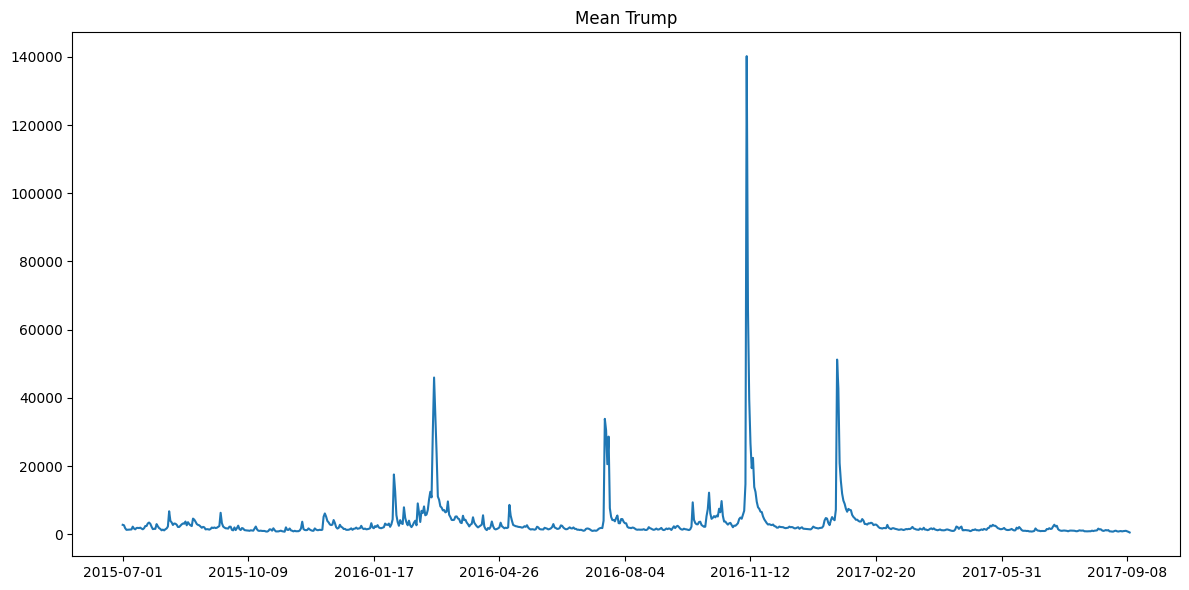

In [36]:
plt.figure(figsize=(12, 6))
time_cols = miscel_tool.extract_time_column_name(df_trump)
df_trump[time_cols].mean().plot()
plt.title('Mean Trump')
plt.tight_layout()
plt.show()